Comparison in between lists and numpy arrays in terms of speed , memory


In [1]:
# creating two 1cr lists and adding them element by element
a = [i for i in range(10000000)]
b = [i for i in range(10000000, 20000000)]
c = []
import time
start = time.time()
for i in range(len(a)):
    c.append(a[i] + b[i])
print(time.time() - start)

3.611548662185669


In [2]:
# now doing using numpy arrays
import numpy as np
a = np.arange(10000000)
b = np.arange(10000000, 20000000)
start = time.time()
c = a + b
print(time.time() - start)

0.13319087028503418


In [3]:
# in terms of memory
a = [i for i in range(10000000)]
import sys
sys.getsizeof(a)

89095160

In [4]:
a = np.arange(10000000, dtype = np.int32)
sys.getsizeof(a)

40000112

In [5]:
# fancy indexing, indexing where normal indexing doesn't make any pattern
a = np.arange(24).reshape(6, 4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [6]:
#let's say above i want 1st row, 2nd row, 6th row which doesn't form any pattern through normal indexing, so we can able to use this
a[[0, 1, -1]]

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [20, 21, 22, 23]])

In [7]:
# we can even get columns also
a[:,[0, 2, -1]]

array([[ 0,  2,  3],
       [ 4,  6,  7],
       [ 8, 10, 11],
       [12, 14, 15],
       [16, 18, 19],
       [20, 22, 23]])

In [8]:
# lee's say we want 1st row 2nd element, 4th row 1st element and 5th row 3rd element
a[[0, 3, 4], [1, 0, 2]]

array([ 1, 12, 18])

In [9]:
# if we want 1st row 2,3 elements, 4th row 1,3 elements, 5th row 1,4 th element
a[[0,3,4], [[1, 2], [0,2], [0, 3]]]

IndexError: shape mismatch: indexing arrays could not be broadcast together with shapes (3,) (3,2) 

In [10]:
# boolean indexing, we know that numpy arrays gives us boolean values when we are performing logical operations
a = np.random.randint(1, 100, 24).reshape(6, 4)
a

array([[66, 74, 72, 77],
       [50, 86, 44, 95],
       [89, 19, 32, 44],
       [44, 59, 85, 41],
       [81,  4, 30, 91],
       [63,  7, 82, 74]])

In [11]:
# below gives a boolean array which gives true if number is >50 and false otherwise
a > 50

array([[ True,  True,  True,  True],
       [False,  True, False,  True],
       [ True, False, False, False],
       [False,  True,  True, False],
       [ True, False, False,  True],
       [ True, False,  True,  True]])

In [12]:
# no we can use this as mask which if we use as index, it will directly show us which numbers >50 are present in it
a[a > 50]

array([66, 74, 72, 77, 86, 95, 89, 59, 85, 81, 91, 63, 82, 74])

In [13]:
# we can even complicate the logic, let's say i want numbers which are >50 and also divisble by 3
a[(a > 50) & (a%3 == 0)]

array([66, 72, 81, 63])

Broadcasting
The term broadcasting describes how NumPy treats arrays with different shapes during arithmetic operations.

The smaller array is “broadcast” across the larger array so that they have compatible shapes.

In [14]:
# same shape
a = np.arange(6).reshape(2,3)
b = np.arange(6,12).reshape(2,3)

print(a)
print(b)

print(a+b)

[[0 1 2]
 [3 4 5]]
[[ 6  7  8]
 [ 9 10 11]]
[[ 6  8 10]
 [12 14 16]]


In [15]:
# diff shape
a = np.arange(6).reshape(2,3)
b = np.arange(3).reshape(1,3)

print(a)
print(b)

print(a+b)

[[0 1 2]
 [3 4 5]]
[[0 1 2]]
[[0 2 4]
 [3 5 7]]


Broadcasting Rules
1. Make the two arrays have the same number of dimensions.

If the numbers of dimensions of the two arrays are different, add new dimensions with size 1 to the head of the array with the smaller dimension.
2. Make each dimension of the two arrays the same size.

If the sizes of each dimension of the two arrays do not match, dimensions with size 1 are stretched to the size of the other array.
If there is a dimension whose size is not 1 in either of the two arrays, it cannot be broadcasted, and an error is raised.


In [16]:
a = np.arange(12).reshape(4,3)
b = np.arange(3)

print(a)
print(b)

print(a+b)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[0 1 2]
[[ 0  2  4]
 [ 3  5  7]
 [ 6  8 10]
 [ 9 11 13]]


In [17]:
a = np.arange(12).reshape(3,4)
b = np.arange(3)

print(a)
print(b)

print(a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[0 1 2]


ValueError: operands could not be broadcast together with shapes (3,4) (3,) 

In [18]:
a = np.arange(3).reshape(1,3)
b = np.arange(3).reshape(3,1)

print(a)
print(b)

print(a+b)

[[0 1 2]]
[[0]
 [1]
 [2]]
[[0 1 2]
 [1 2 3]
 [2 3 4]]


In [19]:
a = np.arange(3).reshape(1,3)
b = np.arange(4).reshape(4,1)

print(a)
print(b)

print(a + b)

[[0 1 2]]
[[0]
 [1]
 [2]
 [3]]
[[0 1 2]
 [1 2 3]
 [2 3 4]
 [3 4 5]]


In [20]:
a = np.array([1])
# shape -> (1,1)
b = np.arange(4).reshape(2,2)
# shape -> (2,2)

print(a)
print(b)

print(a+b)

[1]
[[0 1]
 [2 3]]
[[1 2]
 [3 4]]


In [21]:
a = np.arange(12).reshape(3,4)
b = np.arange(12).reshape(4,3)

print(a)
print(b)

print(a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


ValueError: operands could not be broadcast together with shapes (3,4) (4,3) 

In [22]:
a = np.arange(16).reshape(4,4)
b = np.arange(4).reshape(2,2)

print(a)
print(b)

print(a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
[[0 1]
 [2 3]]


ValueError: operands could not be broadcast together with shapes (4,4) (2,2) 

In [23]:
# to create missing or null values we can use this
a = np.array([1, 2, np.nan, 3, 4, np.nan])
a

array([ 1.,  2., nan,  3.,  4., nan])

In [25]:
# to identify nulll values in an array
np.isnan(a)

array([False, False,  True, False, False,  True])

In [27]:
# let's say if we want to work with array containing only normal values then
a[~np.isnan(a)]

array([1., 2., 3., 4.])

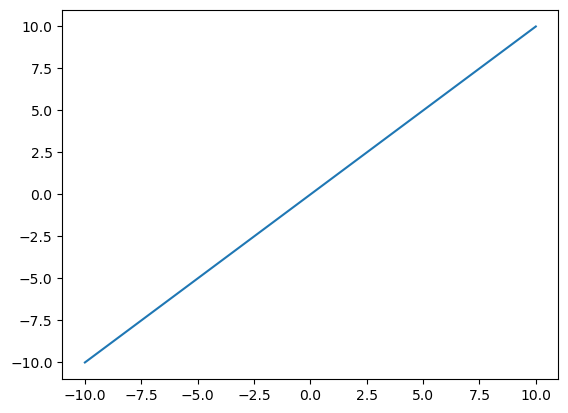

In [29]:
# plotting graphs by using matplotlib
from matplotlib import pyplot as plt
x = np.linspace(-10, 10)
y = x
plt.plot(x, y)

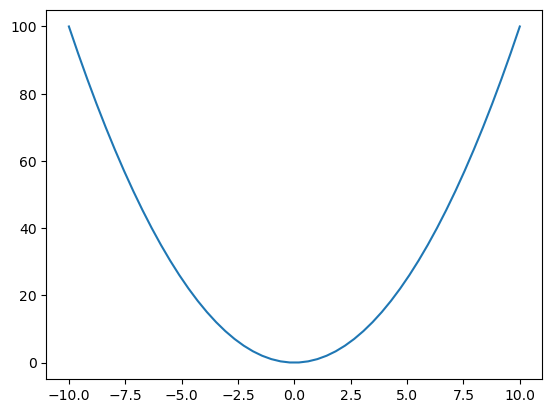

In [30]:
# we can plot whatever we want
y = x ** 2
plt.plot(x, y)

C:\Users\gpava\AppData\Local\Temp\ipykernel_2424\2069701578.py:2: RuntimeWarning: invalid value encountered in log
  y = x * np.log(x)


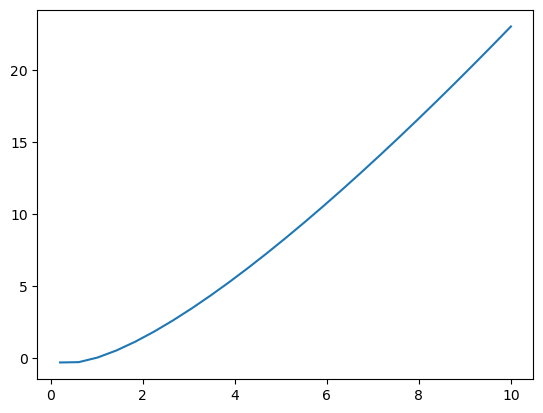

In [31]:
# we can even plot complex functions also
y = x * np.log(x)
plt.plot(x, y)